In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Fashion MNIST Classification

The Fashion MNIST dataset is a collection of 70,000 grayscale images of 28x28 pixels, each showing a single clothing item. There are 10 classes of clothing items:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

This classification task involves building a neural network to correctly identify these clothing items.

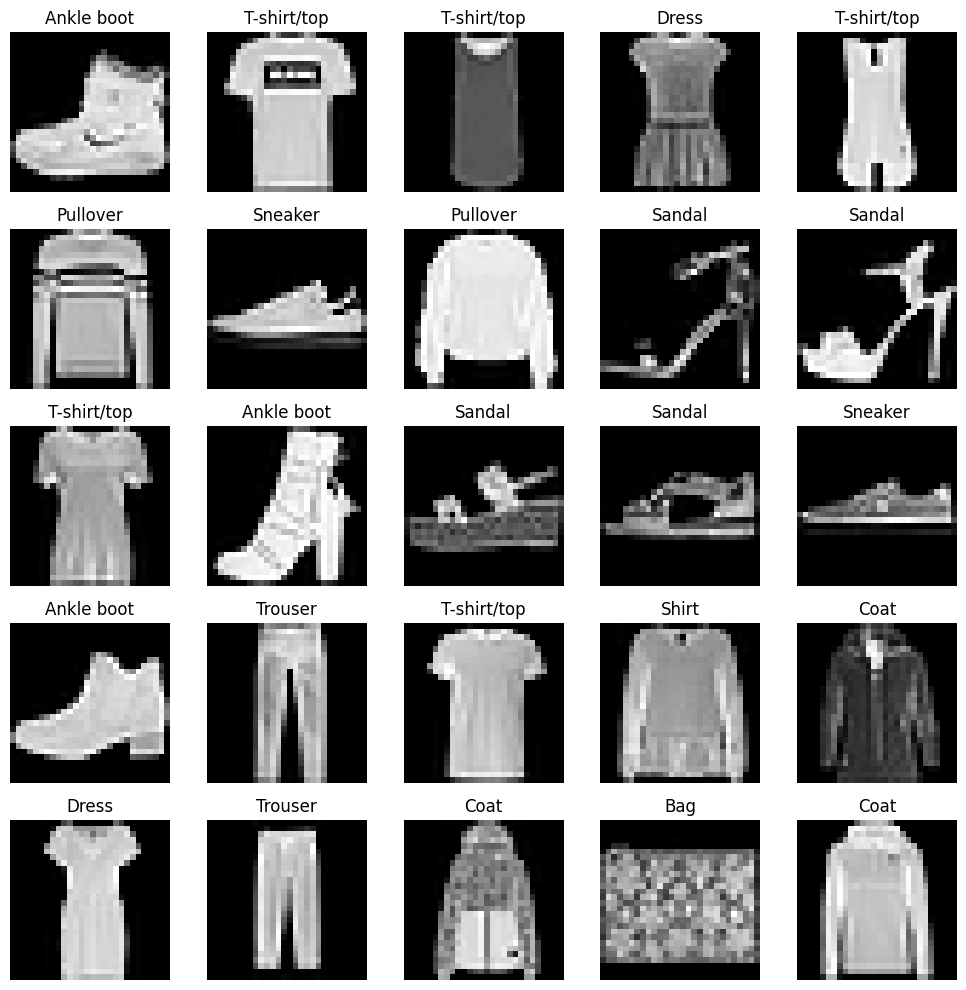

In [3]:
# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Preprocessing the data
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add channel dimension (required for Conv2D layers)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("After preprocessing:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

After preprocessing:
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


# Building the CNN Model

We'll create a Convolutional Neural Network (CNN) for classifying Fashion MNIST images:

1. Conv2D layers to extract features from images
2. MaxPooling2D layers to reduce dimensionality
3. Dropout layers to prevent overfitting
4. Dense layers for classification

In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
750/750 [==============================] - 24s 31ms/step - loss: 0.7503 - accuracy: 0.7325 - val_loss: 0.4255 - val_accuracy: 0.8423
Epoch 2/10
750/750 [==============================] - 24s 31ms/step - loss: 0.7503 - accuracy: 0.7325 - val_loss: 0.4255 - val_accuracy: 0.8423
Epoch 2/10
750/750 [==============================] - 22s 29ms/step - loss: 0.4625 - accuracy: 0.8371 - val_loss: 0.3680 - val_accuracy: 0.8622
Epoch 3/10
750/750 [==============================] - 22s 29ms/step - loss: 0.4625 - accuracy: 0.8371 - val_loss: 0.3680 - val_accuracy: 0.8622
Epoch 3/10
750/750 [==============================] - 24s 33ms/step - loss: 0.3980 - accuracy: 0.8617 - val_loss: 0.3246 - val_accuracy: 0.8808
Epoch 4/10
750/750 [==============================] - 24s 33ms/step - loss: 0.3980 - accuracy: 0.8617 - val_loss: 0.3246 - val_accuracy: 0.8808
Epoch 4/10
750/750 [==============================] - 23s 30ms/step - loss: 0.3564 - accuracy: 0.8748 - val_loss: 0.3057 - val_accuracy:

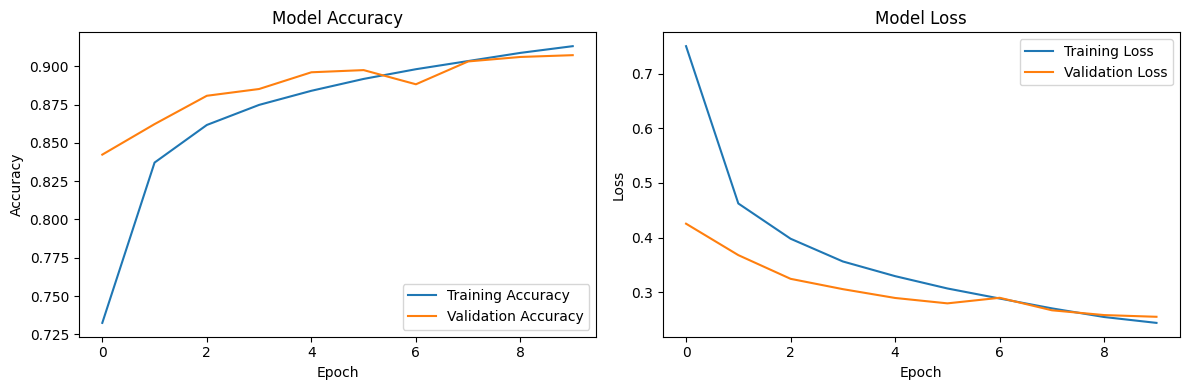

In [7]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2701 - accuracy: 0.9037
Test accuracy: 0.9037
Test loss: 0.2701
313/313 [==============================] - 1s 4ms/step - loss: 0.2701 - accuracy: 0.9037
Test accuracy: 0.9037
Test loss: 0.2701


313/313 [==============================] - 1s 4ms/step


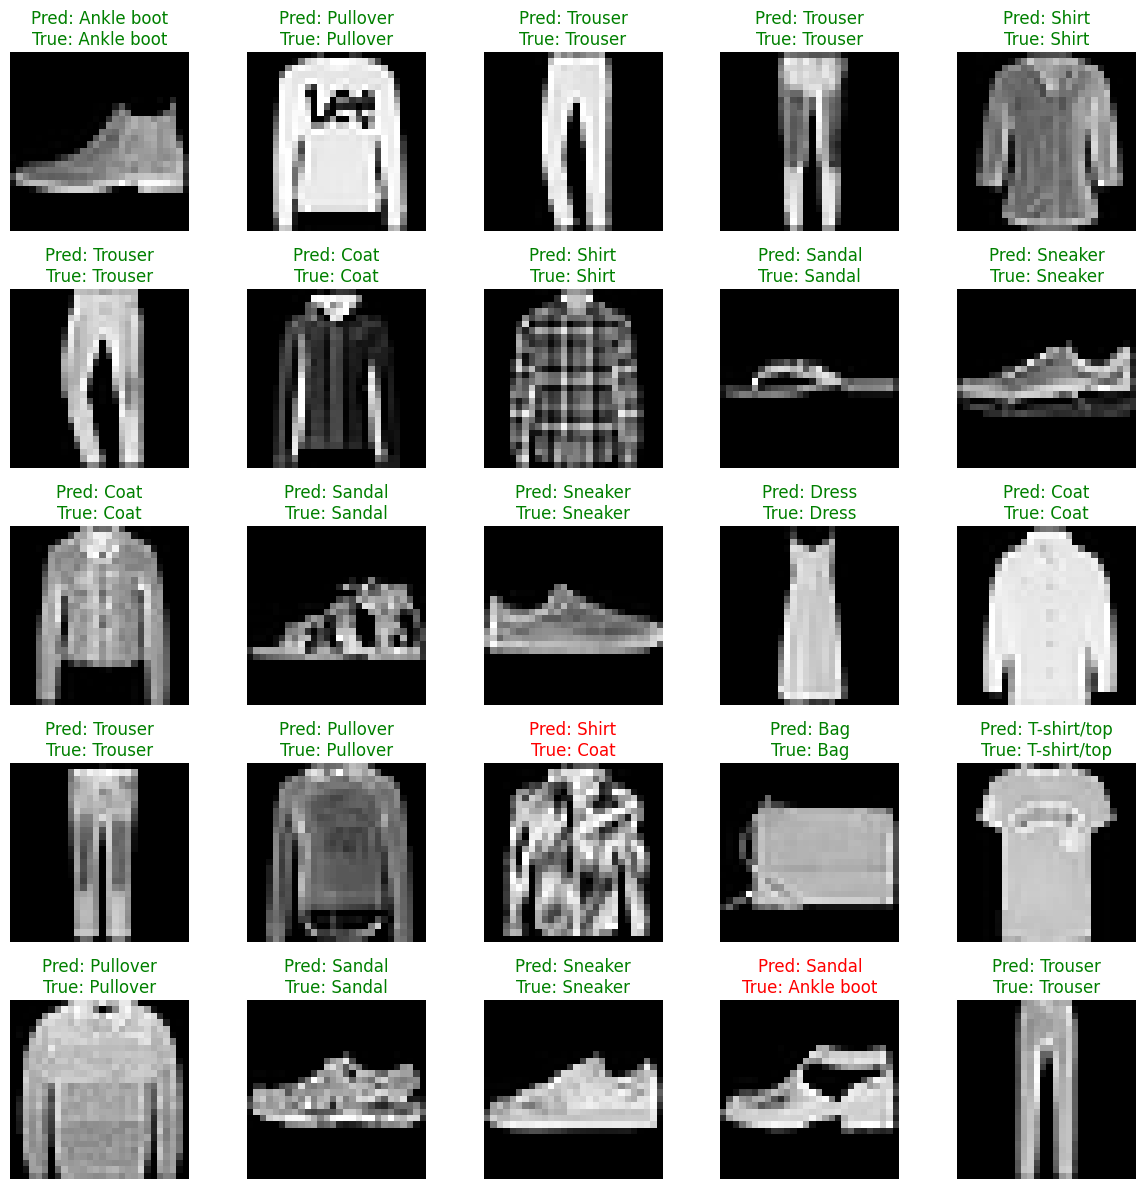

In [9]:
# Make predictions on test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display some predictions
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    
    # Set title with prediction and true class
    color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}", 
              color=color)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

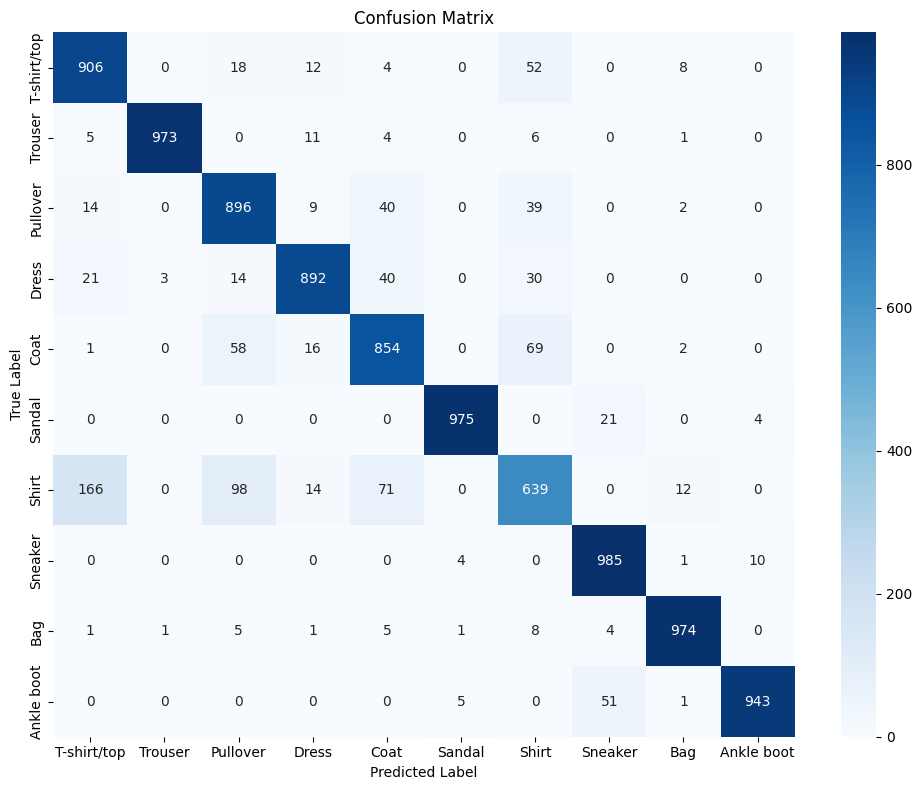

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Conclusion

In this notebook, we:
1. Loaded and explored the Fashion MNIST dataset
2. Built a CNN model with multiple convolutional and dense layers
3. Trained the model with dropout regularization to prevent overfitting
4. Evaluated the model performance on test data
5. Visualized predictions and created a confusion matrix

The model achieves good accuracy on classifying fashion items, though there's still room for improvement with more complex architectures, data augmentation, or hyperparameter tuning.

In [11]:
# Save the model
# Uncomment the following line to save the model
# model.save('fashion_mnist_model.h5')
print("Model training complete!")

Model training complete!
